# CoE LLM Router Usage Guide

## Introduction

The SambaNova CoE (Composition of Experts) LLM Router is a flexible system designed to route queries to the most appropriate expert model based on the content of the query. This notebook will guide you through the process of using the CoE LLM router, explaining its customizable nature, different modes of operation, and how to effectively utilize them.

## Understanding the CoE LLM Router

The CoE LLM Router uses a customizable approach to classify incoming queries into different categories. Each category corresponds to a specific expert model that is best suited to handle queries in that domain.

### Customizable Categories

Users can define their own categories based on their specific needs. Here are some example categories that could be used:

- Finance
- Economics
- Mathematics
- Code Generation
- Legal
- Medical
- History
- Turkish Language
- Japanese Language
- Literature
- Physics
- Chemistry
- Biology
- Psychology
- Sociology
- Generalist (for queries not fitting into specific categories)

Remember, these are just examples. You can define your own categories based on your specific use case and the expert models you have available.

## The Importance of Prompts

The effectiveness of the CoE LLM Router heavily depends on the quality and structure of the prompts used. A well-crafted prompt ensures that the router accurately classifies the query and directs it to the appropriate expert model. When designing your prompt, consider including:

1. A clear instruction to classify the message into one of your predefined categories.
2. Examples of queries for each category to provide context.
3. Any specific rules or considerations for classification.
4. A request for the model to explain its classification decision.

This structured approach helps in maintaining consistency and accuracy in the routing process.

## Modes of Operation

The CoE LLM Router can be run in four different modes:

1. Expert Mode
2. Simple Mode
3. E2E (End-to-End) Mode with Vector Database
4. Bulk QA Mode

Let's explore each of these modes in detail.

### 1. Expert Mode

In this mode, the router only returns the expert category for a given query without invoking the expert model.

In [2]:
import os
import sys
import yaml

current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))
CONFIG_PATH = os.path.join(kit_dir, "config.yaml")

sys.path.append(kit_dir)
sys.path.append(repo_dir)


In [3]:
from CoE_jump_start.src.use_CoE_model import get_expert_only

query = "What is the current inflation rate?"
expert = get_expert_only(query)
print(f"Expert category for query '{query}': {expert}")

USER_AGENT environment variable not set, consider setting it to identify your requests.
INFO:CoE_jump_start.src.use_CoE_model:Expert for query 'What is the current inflation rate?': Generalist


Expert category for query 'What is the current inflation rate?': None


### 2. Simple Mode

This mode routes the query to the appropriate expert model and returns both the expert category and the model's response.

In [4]:
from CoE_jump_start.src.use_CoE_model import run_simple_llm_invoke

query = "Write a Python function to calculate the factorial of a number."
expert, response = run_simple_llm_invoke(query)
print(f"Expert category: {expert}")
print(f"Response: {response}")

INFO:CoE_jump_start.src.use_CoE_model:Expert response: </s>

<<detected category>>: None of the above

The message is asking about writing a Python function to calculate the factorial of a number, which is a general knowledge topic unrelated to contracts, legal matters, financial information, or document metadata. Therefore, it falls under the 'None of the above' category.
INFO:CoE_jump_start.src.use_CoE_model:Expert: Generalist
INFO:CoE_jump_start.src.use_CoE_model:Named expert: Meta-Llama-3-70B-Instruct
INFO:CoE_jump_start.src.use_CoE_model:Response:  The factorial of a number is the product of all positive integers less than or equal to that number. For example, the factorial of 5 (5!) is 5*4*3*2*1 = 120.

Here is a Python function to calculate the factorial of a number:
```
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
```
This function uses recursion to calculate the factorial of a number. The base case is when `n` is 0, in which cas

Expert category: Generalist
Response:  The factorial of a number is the product of all positive integers less than or equal to that number. For example, the factorial of 5 (5!) is 5*4*3*2*1 = 120.

Here is a Python function to calculate the factorial of a number:
```
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
```
This function uses recursion to calculate the factorial of a number. The base case is when `n` is 0, in which case the function returns 1. Otherwise, the function calls itself with `n-1` as an argument, and multiplies the result by `n`.

Here's an example of how to use this function:
```
print(factorial(5))  # Output: 120
```
Alternatively, you can use a loop to calculate the factorial of a number:
```
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result
```
This function uses a loop to iterate from 1 to `n`, and multiplies the result by each integer in that range.

Both of these f

### 3. E2E Mode with Vector Database

This mode uses a vector database for more complex queries that may require context from multiple documents.

In [5]:
from CoE_jump_start.src.use_CoE_model import run_e2e_vector_database
from langchain_community.document_loaders import TextLoader, PyPDFLoader

# Load your document
doc_path = '/path/to/your/document/.pdf'
loader = PyPDFLoader(doc_path)
documents = loader.load()

query = "Summarize the key economic indicators mentioned in the document."
response = run_e2e_vector_database(query, documents)
print(f"Response: {response}")

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


Response:  

        Answer: There are no key economic indicators mentioned in the document. The document appears to be a webpage about SambaNova Systems, Inc. and its products/services, including Sambaverse, which is a platform for finding and fine-tuning open source AI models. The content is focused on the features and capabilities of the platform, rather than economic indicators.


### 4. Bulk QA Mode

This mode is used for evaluating the router's performance on a large dataset of queries.

INFO:root:Starting evaluation of 10 samples...
Processing samples:   0%|          | 0/10 [00:00<?, ?it/s]INFO:CoE_jump_start.src.use_CoE_model:Predicted: None of the above | True: None of the above | ✓
INFO:CoE_jump_start.src.use_CoE_model:Current accuracy: 1.00
Processing samples:  10%|█         | 1/10 [00:02<00:19,  2.16s/it]INFO:CoE_jump_start.src.use_CoE_model:Predicted: None of the above | True: None of the above | ✓
INFO:CoE_jump_start.src.use_CoE_model:Current accuracy: 1.00
Processing samples:  20%|██        | 2/10 [00:04<00:17,  2.15s/it]INFO:CoE_jump_start.src.use_CoE_model:Predicted: bkb | True: bkb | ✓
INFO:CoE_jump_start.src.use_CoE_model:Current accuracy: 1.00
Processing samples:  30%|███       | 3/10 [00:06<00:16,  2.33s/it]INFO:CoE_jump_start.src.use_CoE_model:Predicted: bkb | True: bkb | ✓
INFO:CoE_jump_start.src.use_CoE_model:Current accuracy: 1.00
Processing samples:  40%|████      | 4/10 [00:09<00:13,  2.27s/it]INFO:CoE_jump_start.src.use_CoE_model:Predicted: mali |

Accuracies by category: {'None of the above': 1.0, 'bkb': 1.0, 'mali': 1.0, 'shi': 1.0, 'ssy': 1.0}
Confusion Matrix:
                    ssy  shi  mali  bkb  None of the above
ssy                  2    0     0    0                  0
shi                  0    2     0    0                  0
mali                 0    0     2    0                  0
bkb                  0    0     0    2                  0
None of the above    0    0     0    0                  2


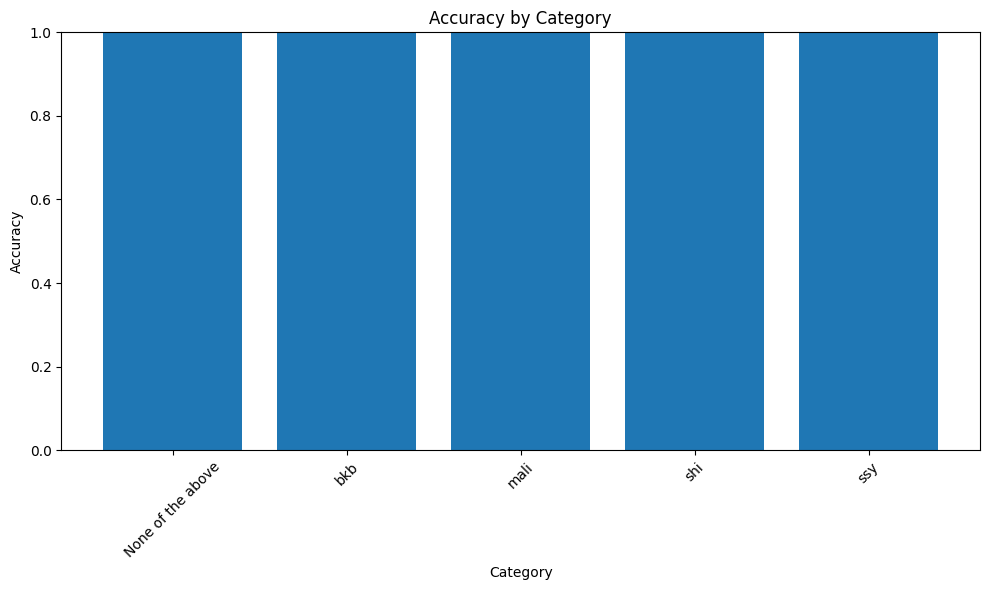

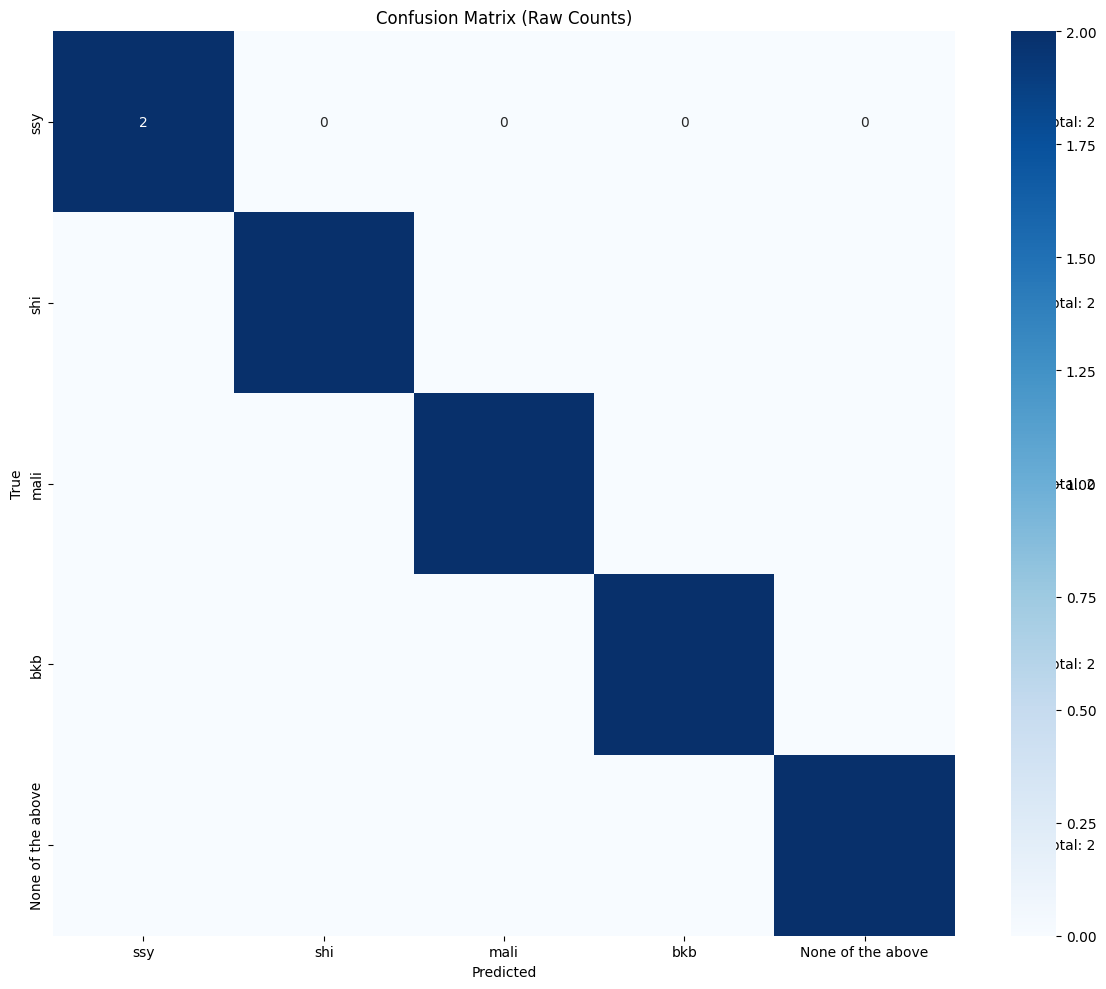

In [7]:
from CoE_jump_start.src.use_CoE_model import run_bulk_routing_eval

dataset_path = "path/to/your/dataset.jsonl"
num_examples = 10  # Set to None to run on entire dataset

results_df, accuracies, confusion_matrix = run_bulk_routing_eval(dataset_path, num_examples)
print("Accuracies by category:", accuracies)
print("Confusion Matrix:\n", confusion_matrix)

## Customizing the CoE LLM Router

To customize the CoE LLM Router for your specific use case:

1. Define your own categories based on your domain expertise and available expert models.
2. Create a mapping between these categories and your expert models.
3. Design a prompt that effectively distinguishes between your categories.
4. Update the configuration file with your custom categories, expert mappings, and prompt.

Remember, the flexibility of the CoE LLM Router allows you to tailor it to your specific needs and continuously refine its performance.

## Conclusion

The CoE LLM Router provides a powerful and flexible way to direct queries to specialized expert models, improving the overall quality and relevance of responses. By understanding the different modes of operation, the importance of well-structured prompts, and the ability to customize categories and expert mappings, you can effectively leverage this system for a wide range of applications.

Remember to always use appropriate error handling and logging in your production code, and to respect the privacy and security considerations when dealing with sensitive information.